In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Load Part 1
data_part = np.load("..\mnist_split_data_10\mnist_part1.npz")
x_train = data_part['x_train']
y_train = data_part['y_train']
x_test = data_part['x_test']
y_test = data_part['y_test']

In [4]:
len(x_train)

5999

In [5]:
len(x_test)

1001

In [6]:
x_train.shape

(5999, 28, 28)

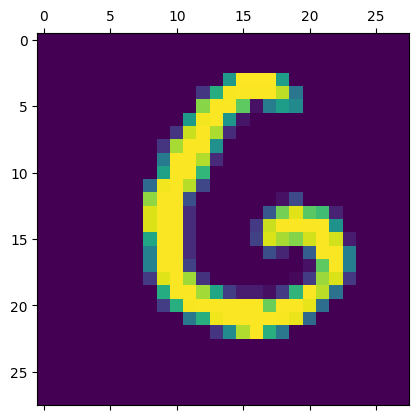

In [7]:
plt.matshow(x_train[4])

In [8]:
x_train = x_train / 255
x_test = x_test / 255

x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [9]:
# Improved Model with Multiple Hidden Layers and Optimizations
model = keras.Sequential([
    # First hidden layer - Feature extraction
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    
    
    # Second hidden layer - Pattern recognition
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Third hidden layer - Feature refinement
    keras.layers.Dense(32, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Output layer - Classification
    keras.layers.Dense(10, activation="softmax")  # Changed to softmax for multi-class
])

# Compile with optimized parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Optimized learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model architecture
model.summary()

# Train with improved parameters
history = model.fit(
    x_train_flatten, y_train,
    epochs=30,           # More epochs for better learning
    batch_size=64,      # Optimal batch size
    validation_split=0.1,
    verbose=1
)

d:\amrita intern\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4712 - loss: 1.6228 - val_accuracy: 0.0833 - val_loss: 2.3248
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7031 - loss: 0.9456 - val_accuracy: 0.0833 - val_loss: 2.3486
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7800 - loss: 0.7389 - val_accuracy: 0.0950 - val_loss: 2.3181
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.6443 - val_accuracy: 0.1367 - val_loss: 2.1640
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.5614 - val_accuracy: 0.3600 - val_loss: 1.8174
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.5098 - val_accuracy: 0.6650 - val_loss: 1.2606
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.4766 - val_accuracy: 0.8650 - val_loss: 0.7089
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.4367 - val_accuracy: 0.8683 - val_loss:

In [10]:
print("\nEvaluating the model on the combined test set...")
loss, accuracy = model.evaluate(x_test_flatten, y_test, verbose=2)

print("\n----------------------------------------------------")
print(f"🎯 Accuracy on Test set: {accuracy * 100:.2f}%")
print("----------------------------------------------------")


Evaluating the model on the combined test set...
32/32 - 0s - 2ms/step - accuracy: 0.9181 - loss: 0.2863

----------------------------------------------------
🎯 Accuracy on Test set: 91.81%
----------------------------------------------------


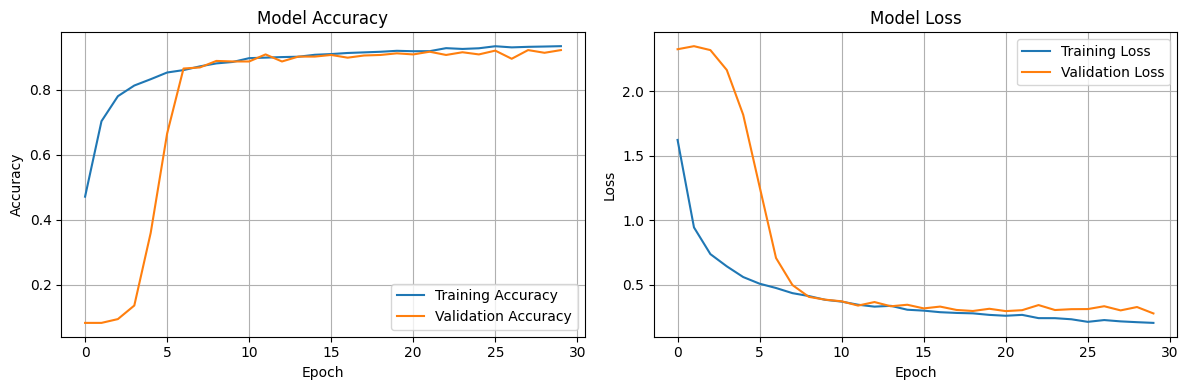

Final Training Accuracy: 93.37%
Final Validation Accuracy: 92.17%


In [11]:
# ...existing code...
# Plot training history to check for overfitting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
# ...existing code...

In [12]:
model.save('..\saved_models\mnist_model_v1.h5') 